In [29]:
import re

with open('article.txt', 'r') as file:
    text = file.read()

In [30]:
# Convert to lowercase
cleaned_text = text.lower()

# Remove digits
cleaned_text = re.sub(r'\d+', '', cleaned_text)

# Remove punctuation
cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)

# Remove extra whitespace
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

In [31]:
cleaned_text

'female exec captured in viral coldplay concert clip resigns a us tech companys chief people officer who was apparently caught on a big screen at a coldplay concert embracing the companys ceo has resigned kristin cabot is no longer working for astronomer the firm told the bbc in a statement her departure follows that of andy byron the companys former ceo who left last week after the firm announced he would be placed on leave and investigated it shows a man and a woman who were identified by us media as the coworkers embracing on a jumbo screen at the arena before they abruptly ducked and hid after seeing the pair try to hide from the camera coldplay lead singer chris martin said to the crowd either theyre having an affair or theyre just very shy the video which showed the pair swaying to music at the concert before trying to hide gained millions of views on social media it was then shared across platforms turned into memes and made fun of on television programmes as internet sleuths at

In [24]:
#install spacy and download the English model
!pip install spacy
!python -m spacy download en_core_web_sm


   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   --------------- ------------------------ 5.5/13.9 MB 30.0 MB/s eta 0:00:01
   --------------------------------- ------ 11.8/13.9 MB 29.5 MB/s eta 0:00:01
   ---------------------------------------- 13.9/13.9 MB 24.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 24.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/630.6 kB ? eta -:--:--
   --------------------------------------- 630.6/630.6 kB 15.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 21.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------------------- - 6.0/6.3 MB 28.8 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 23.5 MB/s eta 0:00:00
   -------------------------

In [32]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(cleaned_text)

# Sentence Tokenization
sentences = [sent.text for sent in doc.sents]

# Word Tokenization
words = [token.text for token in doc if not token.is_space]

# Output
print("Sentences:", sentences[:5])
print("Words:", words[:10])


Sentences: ['female exec captured in viral coldplay concert clip resigns a us tech companys chief people officer who was apparently caught on a big screen at a coldplay concert embracing the companys ceo has resigned kristin cabot is no longer working for astronomer the firm told the bbc in a statement her departure follows that of andy byron the companys former ceo who left last week after the firm announced he would be placed on leave and investigated it shows a man and a woman who were identified by us media as the coworkers embracing on a jumbo screen at the arena before they abruptly ducked and hid after seeing the pair try to hide from the camera coldplay lead singer chris martin said to the crowd either theyre having an affair or theyre just very shy the video which showed the pair swaying to music at the concert before trying to hide gained millions of views on social media it was then shared across platforms turned into memes and made fun of on television programmes as interne

In [33]:
# Remove stopwords using spaCy
filtered_words = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Optional stats
original_word_count = len([t.text for t in doc if not t.is_space])
filtered_word_count = len(filtered_words)
unique_words_before = len(set(words))
unique_words_after = len(set(filtered_words))

print("Before:", original_word_count, "| After:", filtered_word_count)


Before: 347 | After: 183


In [34]:
# Compare original vs lemma for 10 words
sample = [token for token in doc if not token.is_punct][:10]
for token in sample:
    print(f"{token.text} → {token.lemma_}")

female → female
exec → exec
captured → capture
in → in
viral → viral
coldplay → coldplay
concert → concert
clip → clip
resigns → resign
a → a


[('NOUN', 95), ('VERB', 58), ('DET', 47), ('ADP', 41), ('ADJ', 22)]


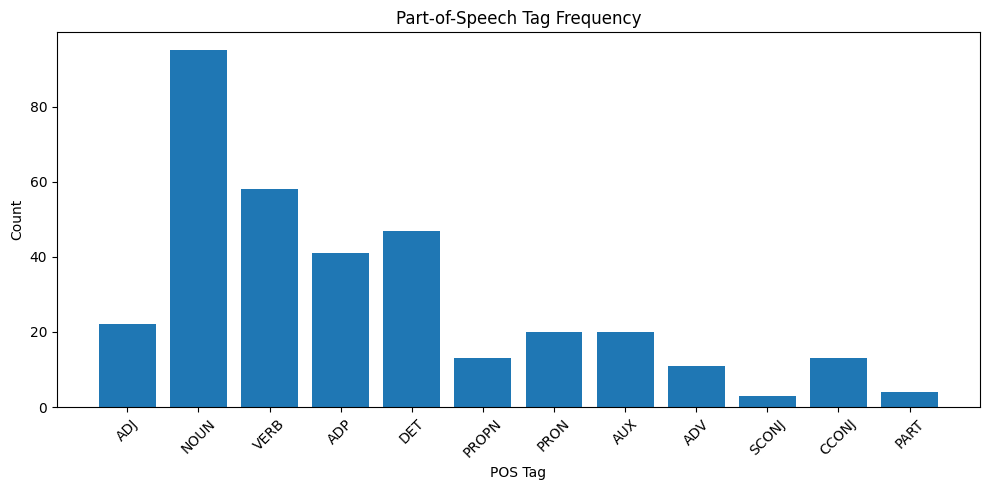

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

# POS tags
pos_tags = [token.pos_ for token in doc if not token.is_space]

# Frequency count
pos_freq = Counter(pos_tags)

# Display top tags
print(pos_freq.most_common(5))

# Plot
plt.figure(figsize=(10, 5))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.title("Part-of-Speech Tag Frequency")
plt.ylabel("Count")
plt.xlabel("POS Tag")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Display entity types
from collections import Counter
entity_types = Counter([label for _, label in entities])
print(entity_types)

# Display entities
for ent_text, label in entities:
    print(f"{ent_text} → {label}")

Counter({'PERSON': 3, 'ORG': 2, 'DATE': 2, 'GPE': 1, 'CARDINAL': 1, 'TIME': 1})
us → GPE
kristin cabot → PERSON
bbc → ORG
andy → PERSON
last week → DATE
chris martin → PERSON
millions → CARDINAL
bbc → ORG
the past few days → DATE
almost overnight → TIME
